In [24]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [77]:
df = pd.read_csv('./reference/100_day_ml_source_code/day32-binning-and-binarization/train.csv',
                 usecols=['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [89]:
df.dropna(inplace=True)
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].round(2)

df.columns = df.columns.str.strip()

print(df.shape)
# df

(714, 3)


In [123]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
# x
# y

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head()

,Age,Fare
328,31,20.52
73,26,14.45
253,30,16.10
719,33,7.78
666,25,13.00


In [137]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [143]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [148]:
pred_results = cross_val_score(DecisionTreeClassifier(), x, y, cv=5, scoring='accuracy')
np.mean(pred_results)

0.6190485570767261

In [152]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [155]:
trf = ColumnTransformer(transformers=[
    ('age', kbin_age, [0]),
    ('fare', kbin_fare, [1])
])

In [158]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [175]:
print("No bins: ", trf.named_transformers_['age'].n_bins_)

No bins:  [10]


In [176]:
trf.named_transformers_['age'].bin_edges_

array([array([ 0., 14., 19., 22., 25., 28., 32., 36., 42., 50., 80.])],
      dtype=object)

In [177]:
trf.named_transformers_['fare'].bin_edges_

array([array([  0.  ,   7.75,   7.9 ,   9.22,  13.  ,  15.75,  26.  ,  29.12,
               51.48,  82.17, 512.33])                                       ],
      dtype=object)


Cross val score: 0.6330985915492957
Strategy:  quantile


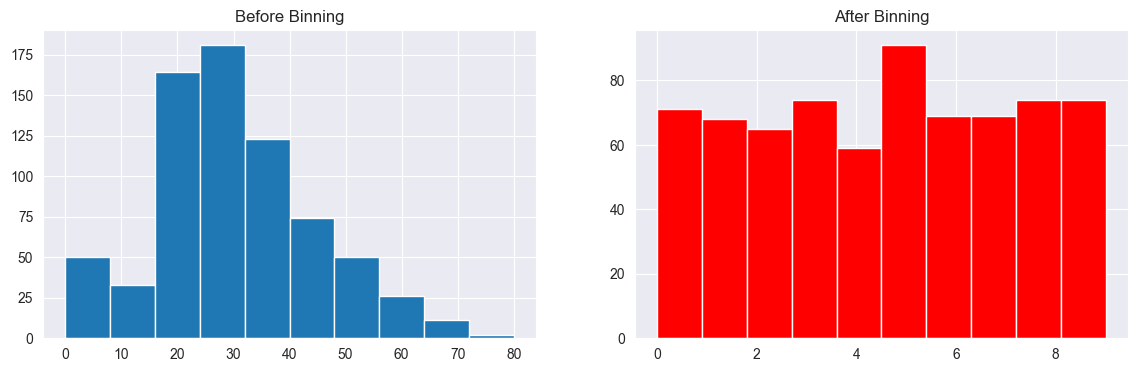


Cross val score: 0.6345070422535211
Strategy:  uniform


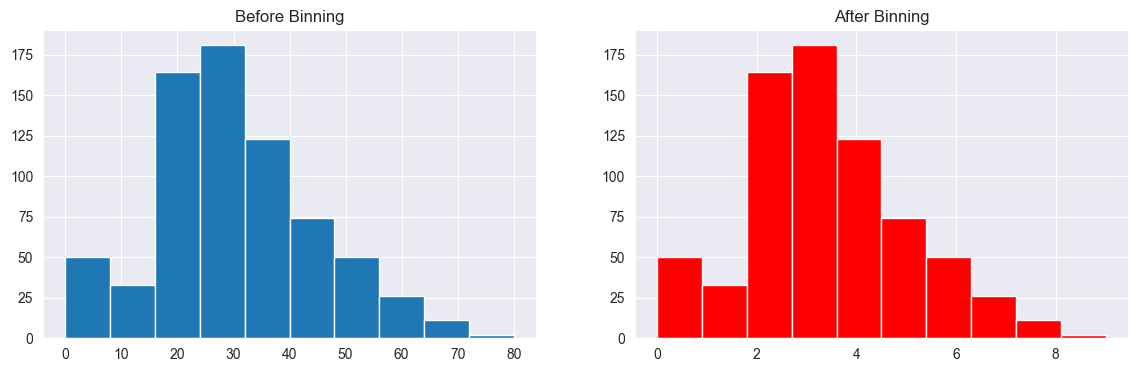


Cross val score: 0.6359350547730829
Strategy:  kmeans


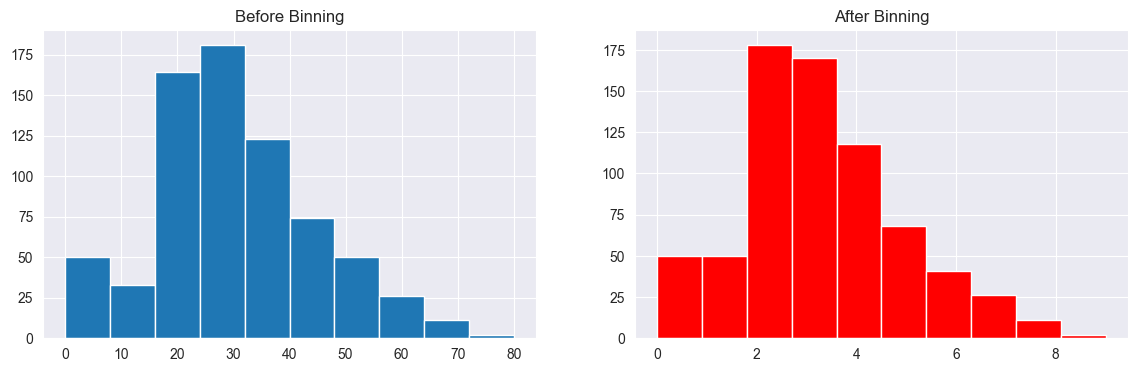

In [230]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy, subsample=None)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy, subsample=None)

    trf = ColumnTransformer(transformers=[
        ('age', kbin_age, [0]),
        ('fare', kbin_fare, [1])
    ])
    x_trf = trf.fit_transform(x)

    pred_results = cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy')
    print()
    print("Cross val score:", np.mean(pred_results))
    print("Strategy: ", strategy)

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before Binning')

    plt.subplot(122)
    plt.hist(x_trf[:, 0], color='red')
    plt.title('After Binning')

    plt.show()


discretize(10, 'quantile')
discretize(10, 'uniform')
discretize(10, 'kmeans')